# **Hate and offensive Language Detection**

# **import nessary Library's**

In [68]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Read The Dataset**

In [69]:
# using pandas to read the Data
df = pd.read_csv('labeled_data.csv')

In [70]:
# first five row of data
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [71]:
# lost five row of Data
df.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


# **Exploratory data analysis(EDA)**

In [72]:
# shape of data
df.shape

(24783, 7)

In [73]:
# print the column name of data
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [74]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [75]:
# data type of the every column
df.dtypes

Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [76]:
# value counts of hate_speech column
df['hate_speech'].value_counts()

hate_speech
0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: count, dtype: int64

In [77]:
# value counts of offensive_language column
df['offensive_language'].value_counts()

offensive_language
3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: count, dtype: int64

In [78]:
# value counts of offensive_language column
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [79]:
# cheking the null values
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

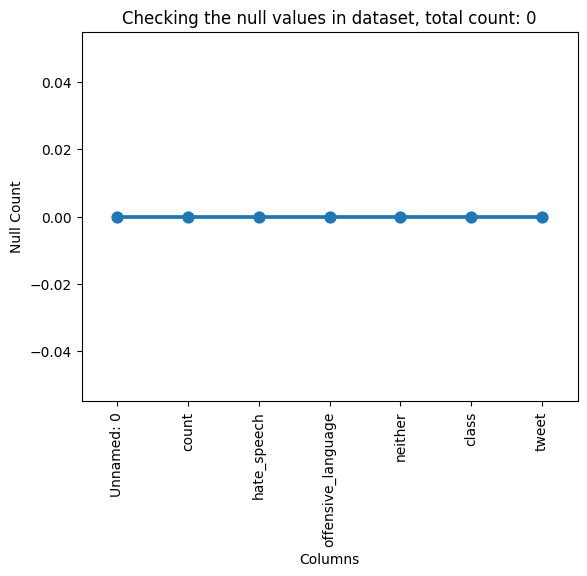

In [80]:
sns.pointplot(x=df.columns, y=df.isnull().sum())
plt.title(f'Checking the null values in dataset, total count: {df.isnull().sum().sum()}')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.show()


In [81]:
# checck the duplicate values in data set
df.duplicated().T

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Length: 24783, dtype: bool

In [82]:
# checck the duplicate values in data set count
df.duplicated().sum()

0

In [83]:
# Describe the data into Stasticaly
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


<Axes: >

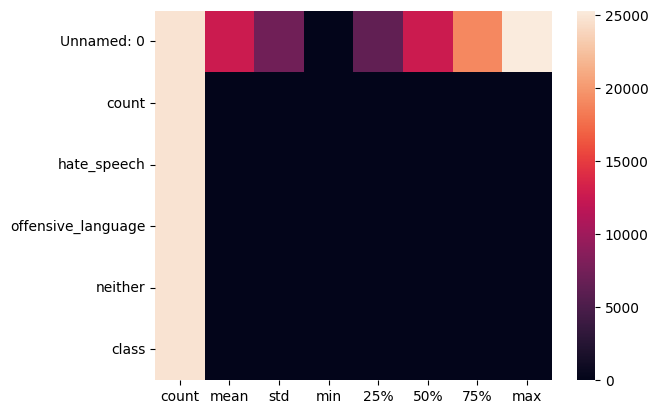

In [84]:
# heat map of describe data
sns.heatmap(df.describe().T)

<Axes: xlabel='count', ylabel='Count'>

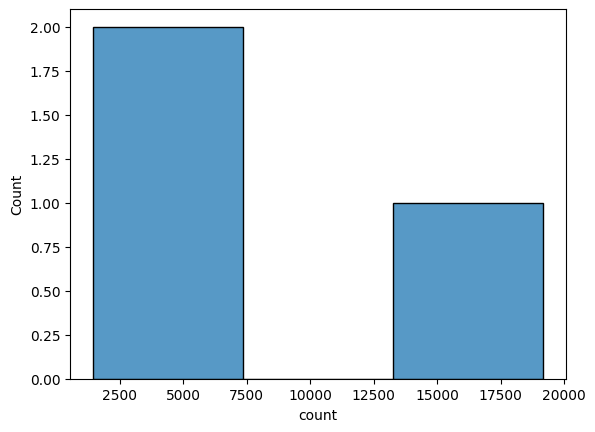

In [85]:
# Class column Value counts in Hate Speeach 
sns.histplot(df['class'].value_counts())

In [86]:
# count the words of data
text_data = df['tweet'].str.cat(sep=' ')
# split the text into words
word_c = {}
for i in text_data.split():
    word_c[i] = word_c.get(i,0)+1

print(f'Total length of words : {len(word_c)}')
print('_________________________________________')


word_counts_sorted = dict(sorted(word_c.items(), key=lambda item: item[1], reverse=True))

print("Top 10 common words")
for word, count in list(word_counts_sorted.items())[:10]:
    print(f"{word}: {count}")

Total length of words : 59006
_________________________________________
Top 10 common words
a: 9099
RT: 7539
bitch: 6638
the: 6590
I: 6472
to: 5240
you: 4881
and: 3670
that: 3111
my: 3072


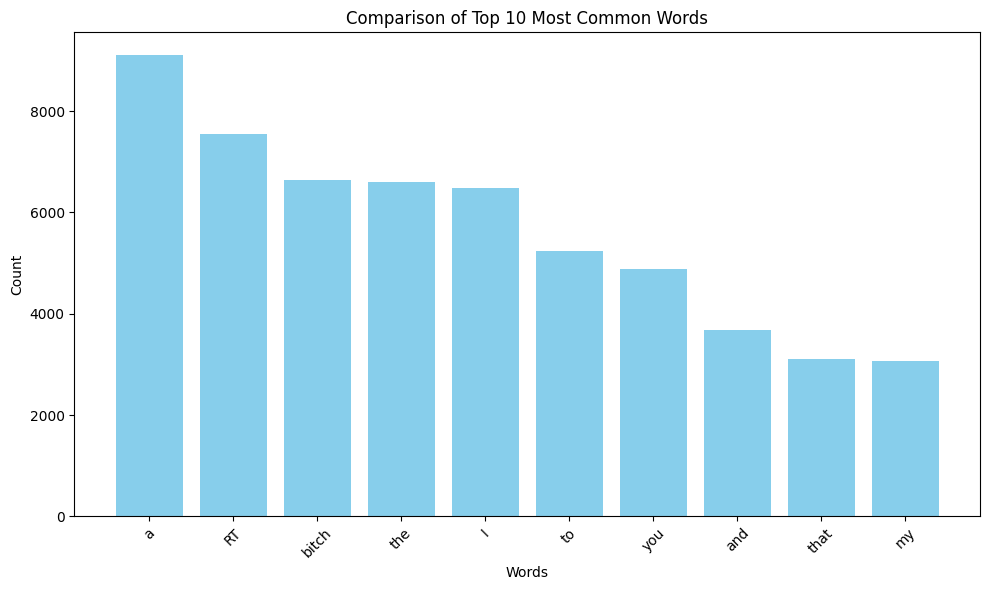

In [87]:

top_n = 10

top_words = list(word_counts_sorted.keys())[:top_n]
word_counts = list(word_counts_sorted.values())[:top_n]

comparison_df = pd.DataFrame({'Word': top_words, 'Count': word_counts})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Word'], comparison_df['Count'], color='skyblue')
plt.title('Comparison of Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [88]:
total_characters = df['tweet'].str.len().sum()
print("Total number of characters in the dataset:", total_characters)

Total number of characters in the dataset: 2117362


In [89]:
import nltk
nltk.download('punkt')
sentences = df['tweet'].apply(nltk.sent_tokenize)
sentences_flat = [sentence for sublist in sentences for sentence in sublist]
total_sentences = len(sentences_flat)
print("Total number of sentences in the dataset:", total_sentences)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total number of sentences in the dataset: 34514


In [90]:
# total data length of tweet column
df['tweet'].shape

(24783,)

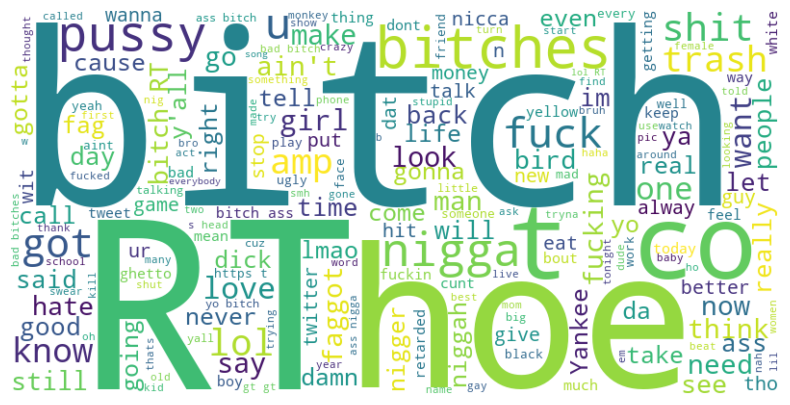

In [91]:
# Import necessary libraries
from wordcloud import WordCloud
# Concatenate all tweets into a single string
all_tweets = ' '.join(df['tweet'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


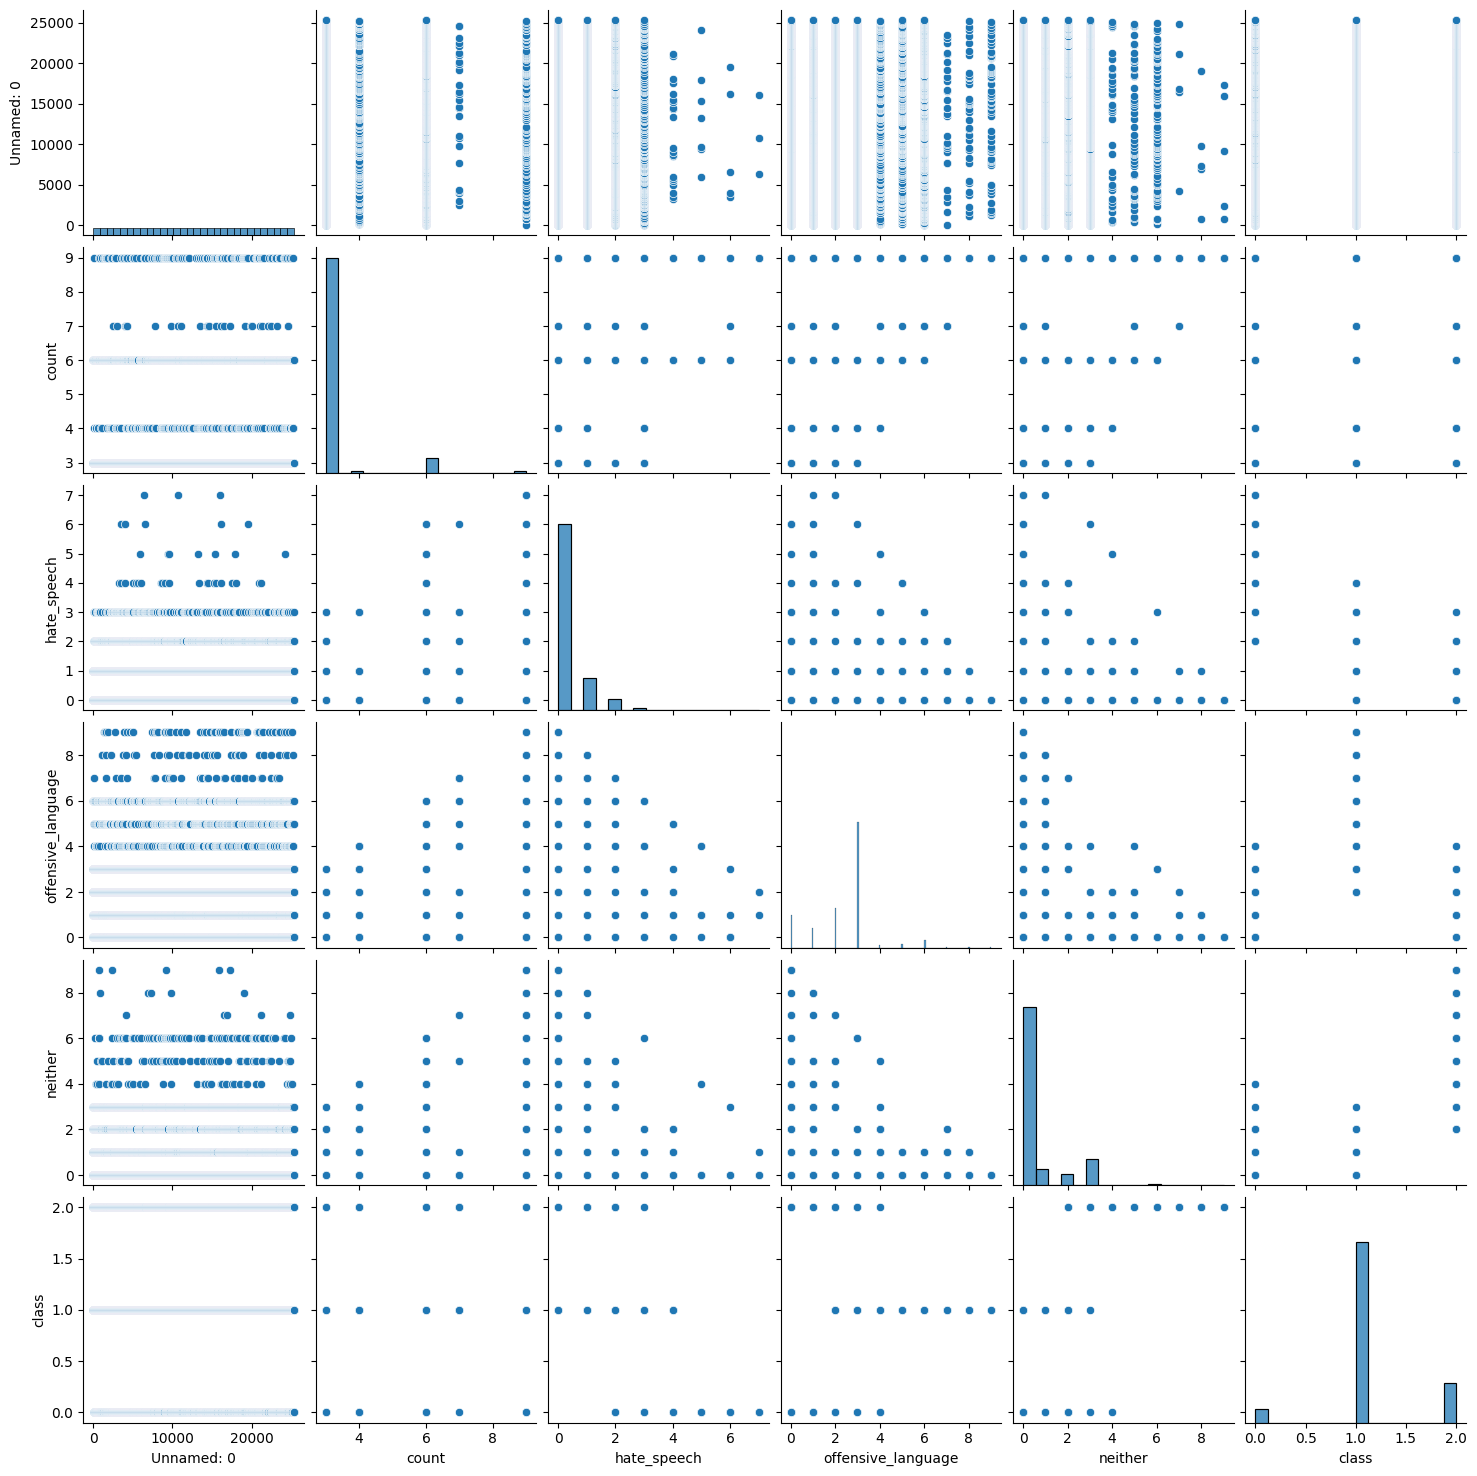

In [92]:
# pair plot
sns.pairplot(df)

# **Pre-processing**

In [93]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [94]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
# Function to preprocess text
def preprocess_text(text):
    # Remove unknown symbols using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text


In [96]:
# Apply preprocessing to the 'tweet' column
df['clean_tweet'] = df['tweet'].apply(preprocess_text)

In [97]:
df['clean_tweet'].head()

0    RT mayasolov woman shouldnt complain clean hou...
1    RT mleew17 boy dat coldtyga dwn bad cuffin dat...
2    RT urkindofbrand dawg RT 80sbaby4lif ever fuck...
3            RT c_g_anderson viva_bas look like tranni
4    RT shenikarobert shit hear might true might fa...
Name: clean_tweet, dtype: object

In [98]:
df['tweet'].head()

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object

In [99]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolov woman shouldnt complain clean hou...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dat coldtyga dwn bad cuffin dat...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT urkindofbrand dawg RT 80sbaby4lif ever fuck...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT c_g_anderson viva_bas look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT shenikarobert shit hear might true might fa...


In [100]:
x = df['clean_tweet']
y = df['class']

In [101]:
# y value counts
y.value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [102]:
# apply HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [103]:
hs = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False)

In [104]:
a = hs.fit_transform(x).toarray()

In [105]:
# apply a Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
c,d = sm.fit_resample(a,y)

In [106]:
d.value_counts()

class
2    19190
1    19190
0    19190
Name: count, dtype: int64

In [107]:
# split the data lnto train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(c,d,test_size=0.3,random_state=72)

# **Module Train**

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [109]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()
de = de.fit(x_train,y_train)

In [110]:
de_pred = de.predict(x_test)

In [111]:
de_acc = accuracy_score(de_pred,y_test)

In [112]:
print(f'accuracy_score of Decision Tree {de_acc}')

accuracy_score of Decision Tree 0.9364831219964102


In [113]:
de_cf = confusion_matrix(de_pred,y_test)

In [114]:
print(de_cf)

[[5520  284   49]
 [ 229 5240  251]
 [  56  228 5414]]


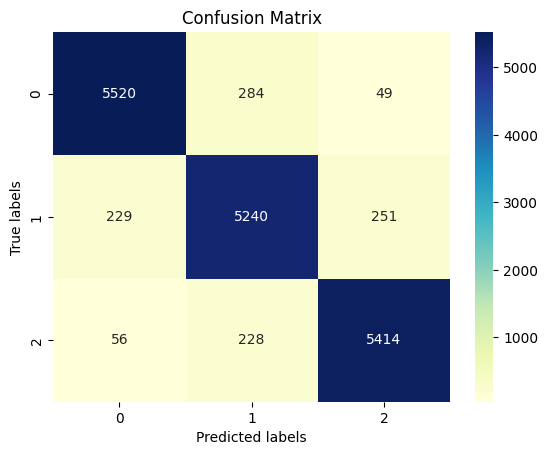

In [115]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(de_pred, y_test)

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
# Classification Report
de_cls =  classification_report(de_pred,y_test)

In [117]:
print(de_cls)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5853
           1       0.91      0.92      0.91      5720
           2       0.95      0.95      0.95      5698

    accuracy                           0.94     17271
   macro avg       0.94      0.94      0.94     17271
weighted avg       0.94      0.94      0.94     17271



In [118]:
import pickle

In [119]:
with open('de.pk',  'wb') as f:
    pickle.dump(de,f)

In [120]:
# Naive_Bayes
from sklearn.naive_bayes import GaussianNB

In [121]:
gb = GaussianNB()
gb = gb.fit(x_train,y_train)

In [122]:
gb_pred = gb.predict(x_test)

In [126]:
gd_acc = accuracy_score(gb_pred,y_test)

In [127]:
print(f'accuracy_score of Naive Bays {gd_acc}')

accuracy_score of Naive Bays 0.7393897284465288


In [128]:
gd_cf = confusion_matrix(gb_pred,y_test)

In [129]:
print(gd_cf)

[[5797 1587  516]
 [   3 2006  231]
 [   5 2159 4967]]


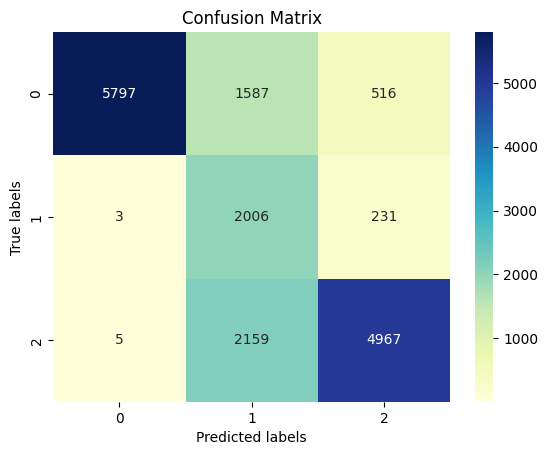

In [130]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(gb_pred, y_test)

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [133]:
# Classification Report
gd_cls =  classification_report(gb_pred,y_test)

In [134]:
print(gd_cls)

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      7900
           1       0.35      0.90      0.50      2240
           2       0.87      0.70      0.77      7131

    accuracy                           0.74     17271
   macro avg       0.74      0.78      0.71     17271
weighted avg       0.86      0.74      0.77     17271



In [136]:
with open('Naive_bayes.pk',  'wb') as f:
    pickle.dump(gb,f)

In [137]:
# accuracy in Data Frame
data_frame = pd.DataFrame({'Module':['DecisionTreeClassifier','GaussianNB'],'accuracy_score':[de_acc*1100,gd_acc*100]})

In [138]:
data_frame

,Module,accuracy_score
0,DecisionTreeClassifier,813.328701
1,GaussianNB,73.938973


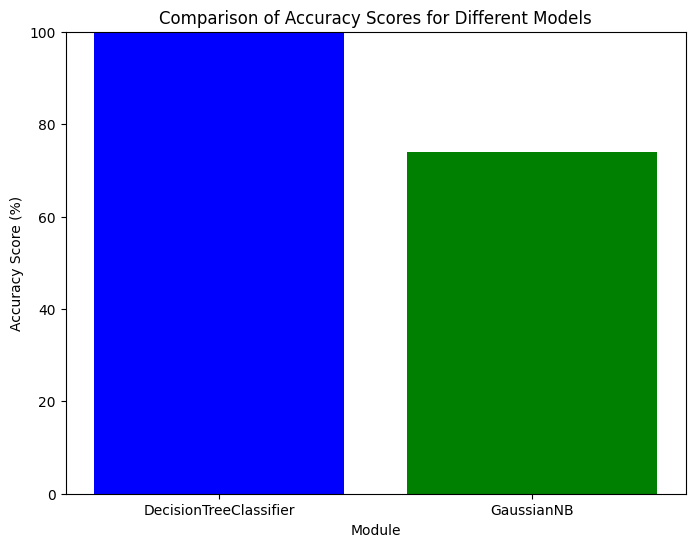

In [139]:
# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.bar(data_frame['Module'], data_frame['accuracy_score'], color=['blue', 'green'])
plt.xlabel('Module')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 100)  # Setting y-axis limit to ensure proper visualization of accuracy scores
plt.show()

In [140]:
# Predoction on Decion Tree
with open('de.pk', 'rb') as f:
    dec = pickle.load(f)

In [141]:
df.clean_tweet[1]

'RT mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place'

In [143]:
inp = ['RT mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place']

In [144]:
hs = HashingVectorizer(n_features=10000)

In [145]:
inp_num = hs.fit_transform(inp).toarray()

In [146]:
inp_num

array([[0., 0., 0., ..., 0., 0., 0.]])

In [148]:
!pip install scikit_learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable


In [151]:
res = dec.predict(inp_num)

In [152]:
res

array([2], dtype=int64)

In [153]:
if res == '0':
    print('Hate and offensive')
elif res == '1':
    print('May be Hate and offensive ')
else:
    print('Not Hate and offensive ')

Not Hate and offensive 


# **---------------------END------------------------**